# Week 8 Python Frameworks Assignment
## COVID-19 Dataset Exploration

This notebook performs:
- Loading a subset of the CORD-19 metadata
- Data cleaning and preparation (all missing values handled)
- Analysis and visualization
- Ready for Streamlit integration


Step 1: Import Required Packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Optional: nicer plots
sns.set(style="whitegrid")


Step 2: Load a Subset of the Dataset

In [15]:
# Columns of interest
cols = ['title', 'publish_time', 'journal', 'authors', 'source_x', 'abstract']

# Load first 10,000 rows for efficiency
df = pd.read_csv('../data/metadata.csv', usecols=cols, nrows=10000)

# Quick check
df.head()


,source_x,title,abstract,publish_time,authors,journal
0,PMC,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,PMC,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,PMC,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,PMC,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,PMC,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res


Step 3: Basic Exploration

In [16]:
# Dataset shape
print("Rows, Columns:", df.shape)

# Data types and missing values
print(df.info())
print(df.isnull().sum())


Rows, Columns: (10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source_x      10000 non-null  object
 1   title         10000 non-null  object
 2   abstract      7855 non-null   object
 3   publish_time  10000 non-null  object
 4   authors       9406 non-null   object
 5   journal       9953 non-null   object
dtypes: object(6)
memory usage: 468.9+ KB
None
source_x           0
title              0
abstract        2145
publish_time       0
authors          594
journal           47
dtype: int64


Step 4: Data Cleaning and Preparation

In [17]:
# Convert publication date to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract publication year
df['year'] = df['publish_time'].dt.year

# Fill missing values for key columns
df['journal'] = df['journal'].fillna('Unknown')
df['authors'] = df['authors'].fillna('Unknown')
df['source_x'] = df['source_x'].fillna('Unknown')  # Handle missing source
df['abstract'] = df['abstract'].fillna('')

# Create new column: abstract word count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.split()))

# Quick check
df.head()


,source_x,title,abstract,publish_time,authors,journal,year,abstract_word_count
0,PMC,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,2001.0,262
1,PMC,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,2000.0,142
2,PMC,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,2000.0,219
3,PMC,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,2001.0,68
4,PMC,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,2001.0,110


Step 5: Data Analysis & Visualization
5.1 Publications by Year

C:\Users\hp\AppData\Local\Temp\ipykernel_2908\1519908713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


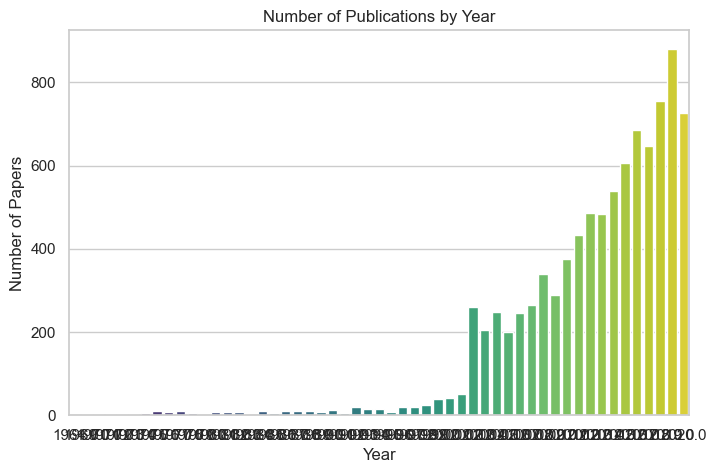

In [18]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title('Number of Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.show()


5.2. Top 10 Journals Publishing COVID-19 Research

C:\Users\hp\AppData\Local\Temp\ipykernel_2908\383469702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")


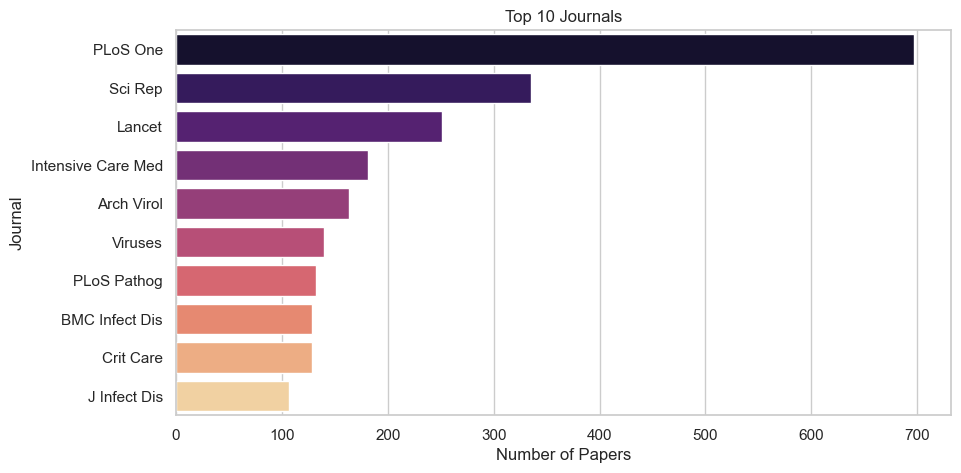

In [19]:
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="magma")
plt.title('Top 10 Journals')
plt.xlabel('Number of Papers')
plt.ylabel('Journal')
plt.show()


5.3. Word Cloud of Titles

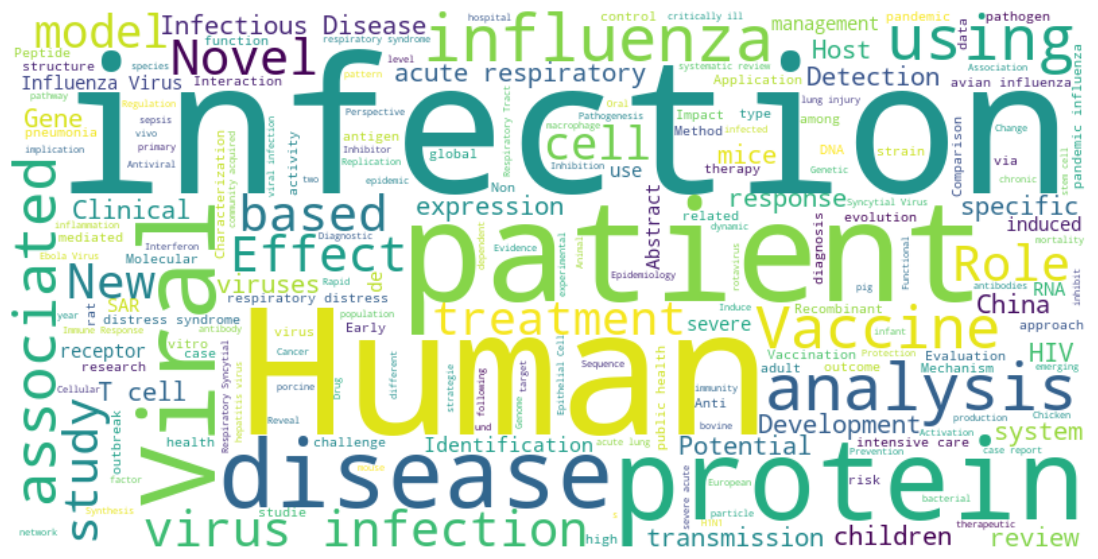

In [20]:
all_titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


4. Distribution by Source

C:\Users\hp\AppData\Local\Temp\ipykernel_2908\832253608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="coolwarm")


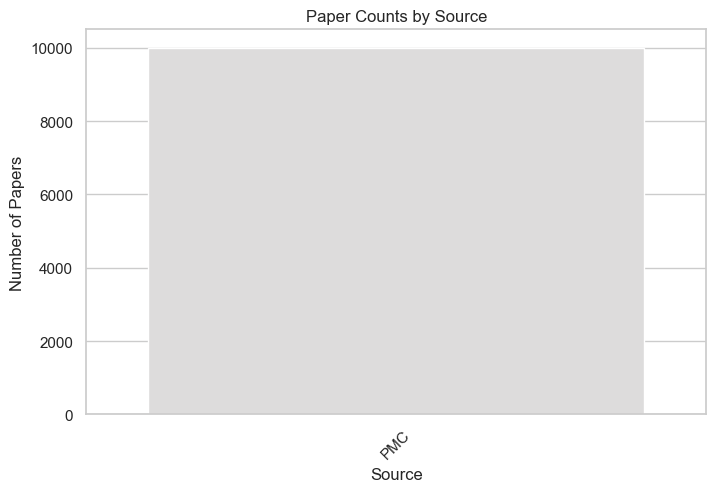

In [21]:
source_counts = df['source_x'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="coolwarm")
plt.title('Paper Counts by Source')
plt.xlabel('Source')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


Step 6: Save Cleaned Subset

In [22]:
df.to_csv('../data/metadata_subset.csv', index=False)


✅ Notebook Summary

Loads a subset of 10,000 rows for speed

Handles all missing values (journal, authors, source_x, abstract)

Extracts year and calculates abstract word count

Creates bar charts and word cloud

Prepares cleaned CSV for Streamlit app